# Housing Prices General (First Trial Model)

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [297]:
df = pd.read_csv("price.csv",header=None)
df

,0,1
0,0,61000
1,50,68000
2,100,65000
3,150,72000
4,200,73000
5,250,73000
6,300,89000
7,350,90000
8,400,105000
9,450,100000


In [298]:
#input
x=df[0].values/1000
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [299]:
#outputs
y=df[1].values/1000
y

array([ 61.,  68.,  65.,  72.,  73.,  73.,  89.,  90., 105., 100., 111.,
       122., 128., 120., 143., 142., 155., 161., 167., 174., 180.])

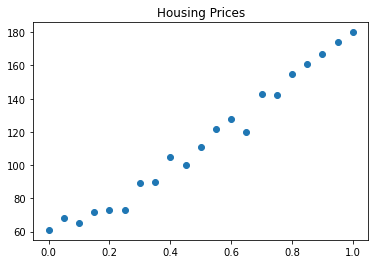

In [300]:
plt.scatter(x, y)
plt.title('Housing Prices')
plt.show()

In [301]:
x.shape[0]

21

In [302]:
def get_cost(x,y,w,b):
    costin=0
    for i in range(x.shape[0]):
        z = w*x[i]+b
        costin += (z-y[i])**2
    J_wb = costin/(2*x.shape[0])
    return J_wb


In [303]:
def dwdb(x,y,w,b):
    dj_dw = 0
    dj_db = 0
    for i in range(x.shape[0]):
        z = w*x[i]+b
        dj_dw += (z - y[i])*x[i]
        dj_db += (z-y[i])
    dj_dw /= x.shape[0]
    dj_db /= x.shape[0]

    return dj_dw,dj_db

In [304]:
def grad_desc(x,y,win,bin,alp):
    w = win
    b = bin
    for i in range(10000):
        dj_dw,dj_db=dwdb(x,y,w,b)
        w = w - alp*dj_dw
        b = b - alp*dj_db

    J = get_cost(x,y,w,b)
    return J,w,b

In [305]:
w_in = 0.5
b_in = 0
alpha = 0.05

J,w,b = grad_desc(x,y,w_in,b_in,alpha)
print(f"(w={w},b={b},J={J})")

(w=124.51948051947862,b=51.978354978355995,J=15.868810554524833)


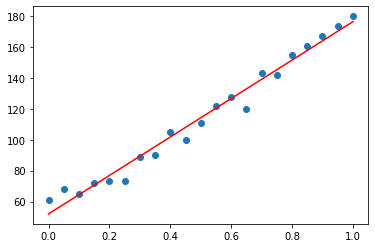

In [306]:
mpl.scatter(x,y)
xJ = np.arange(0,1.01,0.01)
yJ = w*xJ+b
mpl.plot(xJ,yJ,c="r")